In [82]:
import random
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import pandas as pd

In [83]:
%run ../mutaion_gda/func_v3.ipynb

In [84]:
D, J = 100,100

# a side of the site
num_rows_columns = 50

alpha = 0
beta = 0.0001

p = 2
r = 2

h_i = np.full(D, 1 / D)

# 既存のリーダーの施設セット J_L を仮定
J_L = {}  # インデックスとして候補施設の一部を選択
J_F = {}

In [85]:
results_mu0 = []
results_mu1 = []

for i in range(30):
    # mu=0 のケース
    x_Relaxed_LGDA, y_Relaxed_LGDA, obj_final_relaxed_LGDA, \
    x_proj_LGDA, y_proj_LGDA, obj_final_binary_LGDA, obj_final_ex_LGDA, \
    candidate_sites_LGDA, demand_points_LGDA, history_LGDA = lgda_solver(
        D, J, num_rows_columns,
        p, r,
        alpha, beta, h_i, J_L, J_F,
        eta_x=0.01, eta_y=0.01,
        mu=0.,
        max_iter=20000,
        tau_interval=1000,
        return_history=True,
        fix_seed=True,
        seed = i
    )

    results_mu0.append({
        "x_Relaxed": x_Relaxed_LGDA,
        "y_Relaxed": y_Relaxed_LGDA,
        "obj_relaxed": obj_final_relaxed_LGDA,
        "x_proj": x_proj_LGDA,
        "y_proj": y_proj_LGDA,
        "obj_binary": obj_final_binary_LGDA,
        "obj_ex": obj_final_ex_LGDA,
        "candidate_sites": candidate_sites_LGDA,
        "demand_points": demand_points_LGDA,
        "history": history_LGDA
    })

    # mu=1 のケース
    x_Relaxed, y_Relaxed, obj_final_relaxed, \
    x_proj, y_proj, obj_final_binary, obj_final_ex, \
    candidate_sites, demand_points, history = lgda_solver(
        D, J, num_rows_columns,
        p, r,
        alpha, beta, h_i, J_L, J_F,
        eta_x=0.01, eta_y=0.01,
        mu=1.,
        max_iter=20000,
        tau_interval=1000,
        return_history=True,
        fix_seed=True,
        seed = i
    )

    results_mu1.append({
        "x_Relaxed": x_Relaxed,
        "y_Relaxed": y_Relaxed,
        "obj_relaxed": obj_final_relaxed,
        "x_proj": x_proj,
        "y_proj": y_proj,
        "obj_binary": obj_final_binary,
        "obj_ex": obj_final_ex,
        "candidate_sites": candidate_sites,
        "demand_points": demand_points,
        "history": history
    })

0
0
1
1
2
2
3
3
4
4
5
5
6
6
7
7
8
8
9
9
10
10
11
11
12
12
13
13
14
14
15
15
16
16
17
17
18
18
19
19
20
20
21
21
22
22
23
23
24
24
25
25
26
26
27
27
28
28
29
29


In [86]:
print(len(results_mu0))
print(len(results_mu1))

30
30


In [87]:
import pandas as pd

def rank_objective_absdiff(results_mu0, results_mu1, objective_key="obj_relaxed"):
    """
    各試行で |obj_mu1 - obj_mu0| を計算し、降順にランキング表示
    どちらが大きいかも出力
    """
    n = min(len(results_mu0), len(results_mu1))
    rows = []
    for i in range(n):
        o0 = results_mu0[i].get(objective_key, None)
        o1 = results_mu1[i].get(objective_key, None)
        if o0 is None or o1 is None:
            continue

        diff = abs(o1 - o0)
        bigger = "mu=1" if o1 > o0 else "mu=0" if o0 > o1 else "equal"

        rows.append({
            "trial": i,
            f"{objective_key}_mu0": o0,
            f"{objective_key}_mu1": o1,
            "abs_diff": diff,
            "bigger": bigger
        })

    df = pd.DataFrame(rows)
    df_sorted = df.sort_values("abs_diff", ascending=False).reset_index(drop=True)

    print(f"=== Ranking by |mu1 - mu0| for '{objective_key}' ===")
    print(df_sorted.to_string(index=False))

    return df_sorted

# 使い方例
print("binary")
df_bin = rank_objective_absdiff(results_mu0, results_mu1, objective_key="obj_binary")
print("ex")
df_ex  = rank_objective_absdiff(results_mu0, results_mu1, objective_key="obj_ex")
print("obj_relaxed")
df_rel = rank_objective_absdiff(results_mu0, results_mu1, objective_key="obj_relaxed")


binary
=== Ranking by |mu1 - mu0| for 'obj_binary' ===
 trial  obj_binary_mu0  obj_binary_mu1  abs_diff bigger
    10        0.499852        0.500235  0.000383   mu=1
    17        0.499847        0.500173  0.000326   mu=1
    24        0.499918        0.500237  0.000319   mu=1
    22        0.499908        0.500163  0.000255   mu=1
    20        0.499942        0.500172  0.000230   mu=1
    26        0.499973        0.500200  0.000227   mu=1
     7        0.500133        0.499908  0.000225   mu=0
    18        0.499993        0.500216  0.000222   mu=1
     9        0.499983        0.500203  0.000220   mu=1
    15        0.500034        0.500243  0.000209   mu=1
    19        0.500126        0.499947  0.000179   mu=0
     6        0.500071        0.500249  0.000178   mu=1
    16        0.500212        0.500052  0.000160   mu=0
     2        0.499890        0.500049  0.000159   mu=1
     1        0.500049        0.500184  0.000135   mu=1
    23        0.500077        0.499951  0.000126 

In [99]:
results_mu0

[{'x_Relaxed': array([0.02030993, 0.02025191, 0.02029226, 0.02220853, 0.02020714,
         0.01953371, 0.02049413, 0.01990207, 0.0203958 , 0.02774375,
         0.0199729 , 0.01690535, 0.02006702, 0.02925655, 0.02868696,
         0.01425438, 0.02041206, 0.01857432, 0.0173467 , 0.02047531,
         0.0201761 , 0.01987083, 0.02022902, 0.02042984, 0.01424527,
         0.01478934, 0.01234143, 0.02018249, 0.01528424, 0.02046438,
         0.0212593 , 0.01983823, 0.02007629, 0.02043543, 0.01763398,
         0.02043321, 0.02044542, 0.02031828, 0.02859885, 0.01982855,
         0.02038047, 0.02007077, 0.02001012, 0.01990952, 0.02018593,
         0.02013719, 0.02027628, 0.01987536, 0.02036249, 0.02032184,
         0.02047682, 0.02046865, 0.01930187, 0.02584732, 0.02029455,
         0.0204943 , 0.02030245, 0.01980768, 0.02030819, 0.01927977,
         0.02027393, 0.02022681, 0.01686042, 0.02910043, 0.02007153,
         0.02022282, 0.02036427, 0.01684031, 0.02010345, 0.02044911,
         0.0200941 , 

In [101]:
print("\nOptimal x:", x_proj)
print("Optimal y:", y_proj)
print("\nOptimal real x:", x_Relaxed)
print("Optimal real y:", y_Relaxed)

print("\nObjective (Relaxed):", obj_final_relaxed)
print("Objective (Binary):", obj_final_binary)
# print("\nHistory of dx:", history["dx"])
# print('objective:', history["objective"][-1])
# print("num of iter:", len(history["objective"]))


Optimal x: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0.]
Optimal y: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]

Optimal real x: [0.02106894 0.02106342 0.01494855 0.02107596 0.02104204 0.02362166
 0.02107965 0.02100068 0.0237692  0.02103053 0.02105024 0.02355875
 0.02106831 0.00448535 0.02101928 0.0210528  0.02103618 0.02107336
 0.02105235 0.02107322 0.02102223 0.00452371 0.00760176 0.00521295
 0.02101858 0.02941203 0.02103813 0.00932921 0.00429158 0.02102416
 0.02316262 0

## trial 16

In [89]:
%run ../mutaion_gda/func_v3.ipynb

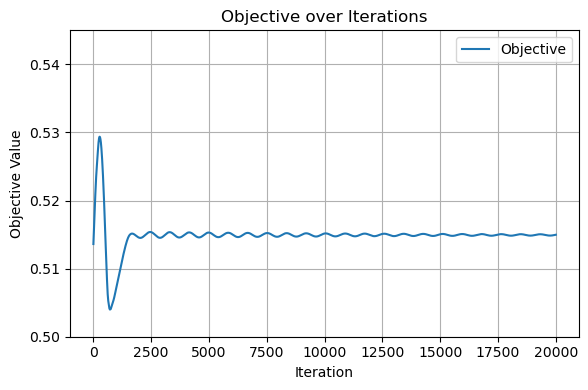

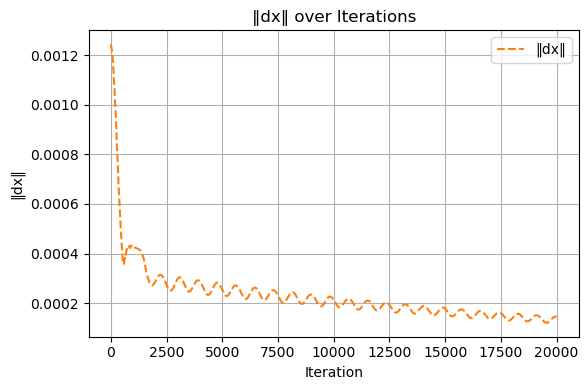

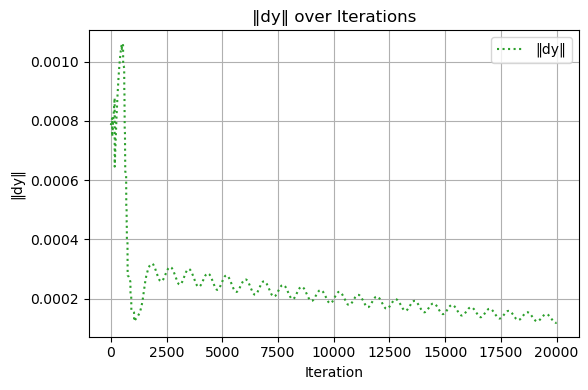

In [100]:
plot_each_history_component_separately(results_mu0[24]["history"], fix_seed=True)

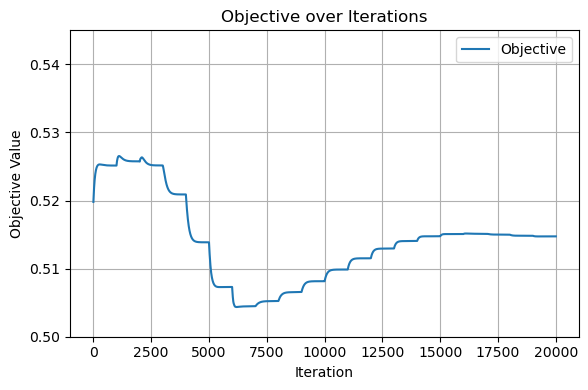

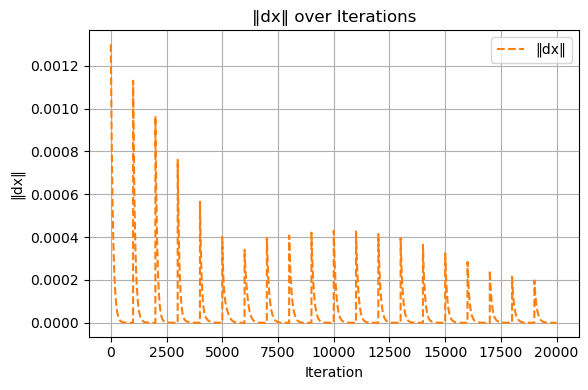

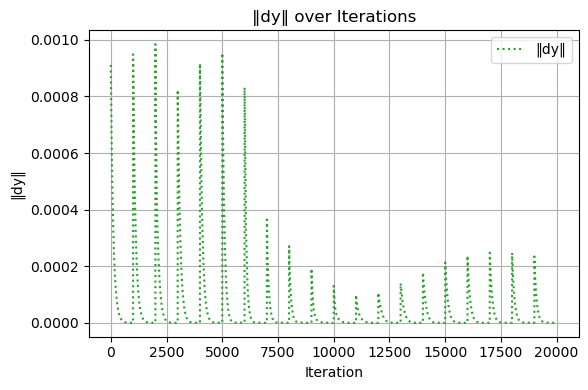

In [91]:
plot_each_history_component_separately(results_mu1[23]["history"], fix_seed=True)

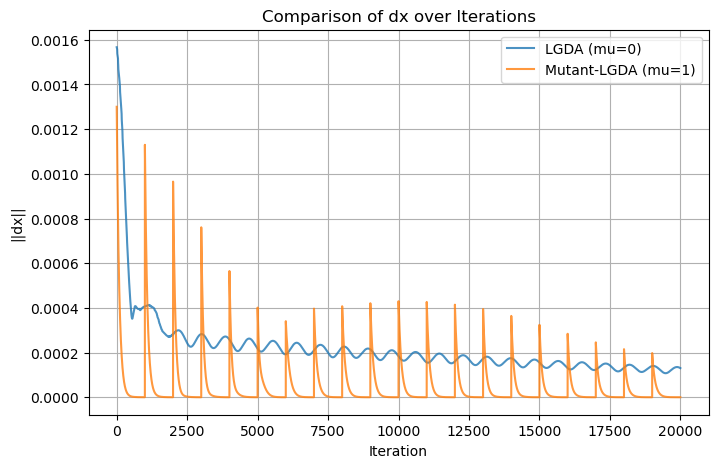

In [95]:
hist0 = results_mu0[23]["history"]
hist1 = results_mu1[23]["history"]

dx0 = np.array(hist0["dx"])
dx1 = np.array(hist1["dx"])

# プロット
plt.figure(figsize=(8,5))
plt.plot(dx0, label="LGDA (mu=0)", alpha=0.8)
plt.plot(dx1, label="Mutant-LGDA (mu=1)", alpha=0.8)

plt.xlabel("Iteration")
plt.ylabel("||dx||")
plt.title("Comparison of dx over Iterations")
plt.legend()
plt.grid(True)
plt.show()

In [98]:
d1, c1 = generate_instance(50, 20, 20, seed=1)
d2, c2 = generate_instance(50, 20, 20, seed=2)

print(d1 == d2)  # True?
print(c1 == c2)  # True?


False
False


In [1]:
for i in range(30):  
    hist0 = results_mu0[i]["history"]
    hist1 = results_mu1[i]["history"]

    dx0 = np.array(hist0["objectiove"])
    dx1 = np.array(hist1["objectiove"])

    # プロット
    plt.figure(figsize=(8,5))
    plt.plot(dx0, label="LGDA (mu=0)", alpha=0.8)
    plt.plot(dx1, label="Mutant-LGDA (mu=1)", alpha=0.8)

    plt.xlabel("Iteration")
    plt.ylabel("objectiove")
    plt.title("Comparison of objectiove over Iterations")
    plt.legend()
    plt.grid(True)
    plt.show()

NameError: name 'results_mu0' is not defined

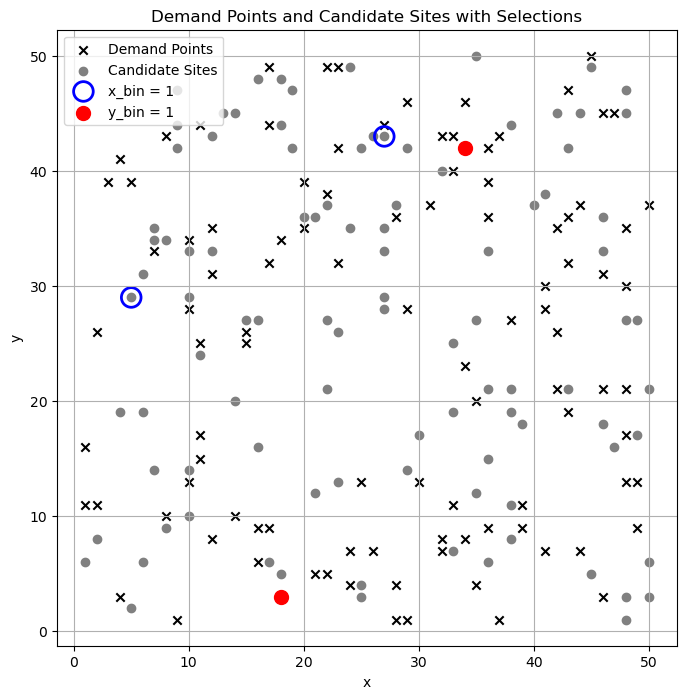

In [92]:
#plot_minmax_history(history["objective"], history["dx"], history["dy"], logy=True)
plot_facility_selection(candidate_sites, demand_points, x_proj, y_proj)

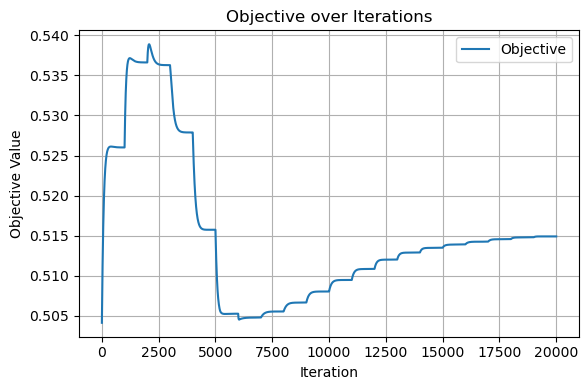

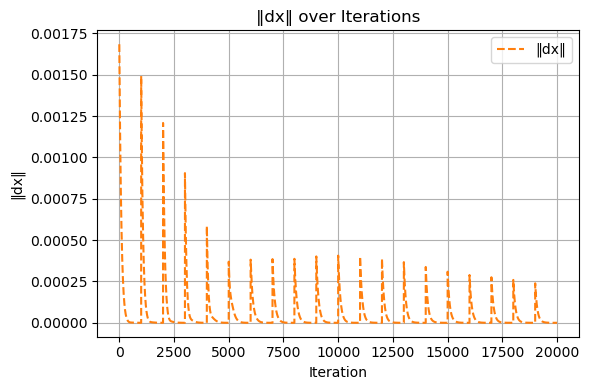

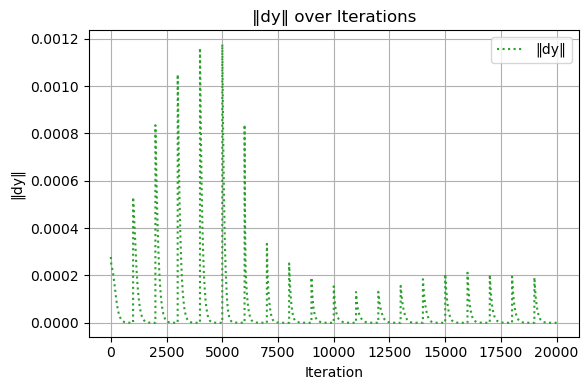

In [93]:
plot_each_history_component_separately(history)

{'iters_recorded': 20000, 'median_rel_obj_change': 7.71778676522672e-08, 'last_rel_obj_change': 7.601275164859089e-11, 'obj_sign_flips': 12, 'dx_last': 9.133441611163719e-09, 'dx_moving_avg_last': 1.196339267395333e-08, 'dx_below_tol_ratio': 0.39335, 'dy_last': 9.015457720419771e-09, 'dy_moving_avg_last': 1.1519963193499306e-08, 'dy_below_tol_ratio': 0.43285, 'likely_stagnated': False, 'likely_oscillating': False}


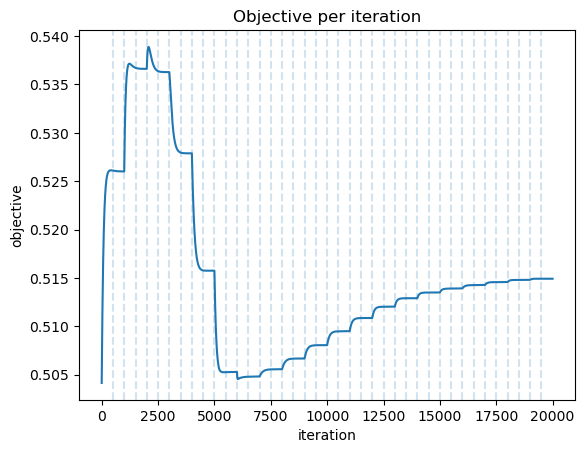

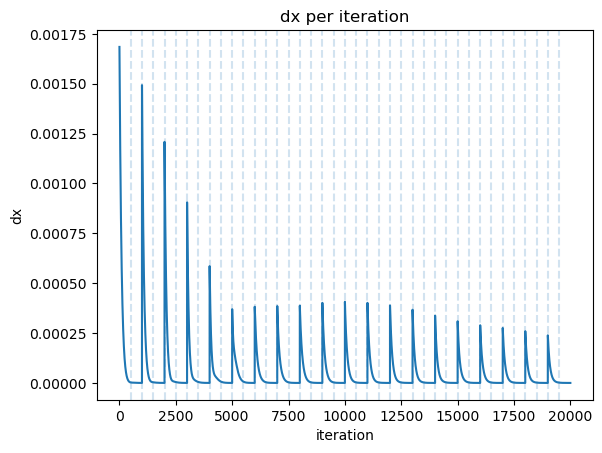

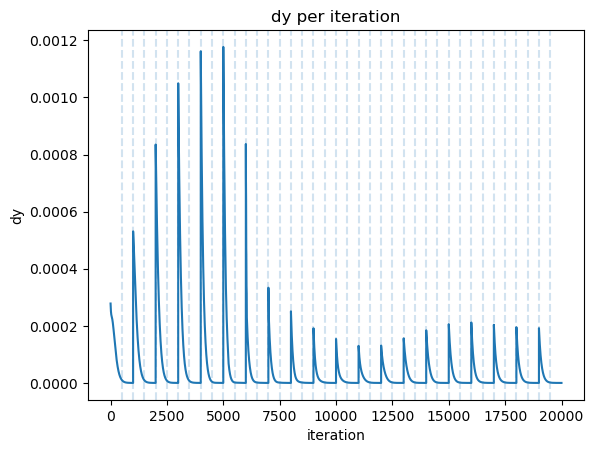

In [94]:
diag = summarize_history(history, tol=1e-6)
print(diag)

# 2) 可視化（tau_interval をそのまま渡すと便利）
plot_history(history, tau_interval=500)